# Multiomics Visualisation

For more information please contact [Tyrone Chen](mailto:tyrone.chen@monash.edu) or [Sonika Tyagi](mailto:sonika.tyagi@monash.edu).

## Table of contents
1. [Information for biologists](#biologists)
2. [Information for bioinformaticians](#bioinformaticians)
3. [Plotting steps](#plotting)
4. *Work in progress* [Filtering data to be visualised](#filtering)


## UpSetPlots

### Information for biologists <a name="biologists"></a>
UpSetPlots are a visualisation method which can be interpreted as a quantitative venn diagram. [More information on the method can be found in the original 2014 publication](https://rdcu.be/bO4oV), and a [sample interactive UpSetPlot on unrelated data is available here](https://vdl.sci.utah.edu/upset2/embed.html#{"NavBar":false,"FilterBox":false,"DataSetInfo":false,"LeftSideBar":true,"RightSideBar":false,"ProvenanceView":false,"DeviationBars":true,"CardinalityBars":true}).

### Information for biolnformaticians <a name="bioinformaticians"></a>
Implementations exist in [javascript](https://github.com/VCG/upset), [python](https://pypi.org/project/UpSetPlot/) and [R](https://github.com/hms-dbmi/UpSetR). For this `python` implementation the requirements is just `upsetplot` which can be installed with:

```
pip install upsetplot
```
or
```
conda install upsetplot -c conda-forge
```

While the following libraries are also required, they should get installed automatically when installing the UpSetPlot library through conda:
```
numpy
pandas
```
[OPTIONAL] If using a jupyter notebook in a `conda` or other virtual environment, the following library can be used to easily switch kernels:
```
nb_conda=2.2.1
```

## Plotting steps <a name="plotting"></a>

The aim is to plot the intersection of foo across bar.

Below is an example use case:

In [1]:
import numpy
import pandas
from matplotlib import pyplot as plt
from upsetplot import from_contents, from_memberships, plot, generate_counts, UpSet
%matplotlib inline

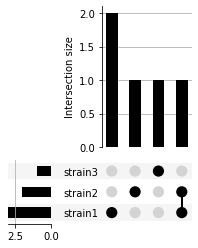

id
strain1 strain2 strain3           
True    False   False    pathway_a
        True    False    pathway_b
        False   False    pathway_c
False   True    False    pathway_d
        False   True     pathway_e

In [2]:
contents = {'strain1': ['pathway_a', 'pathway_b', 'pathway_c'],
            'strain2': ['pathway_b', 'pathway_d'],
            'strain3': ['pathway_e']}
contents = from_contents(contents)

upset = UpSet(contents, subset_size='count')#, intersection_plot_elements=3)
upset.plot()
plt.show()

contents

Reformatting the input data is straightforward:
    1. Load input data as a pandas dataframe
    2. Extract the required fields
    3. Reformat data to an input for upsetplot
    4. Make UpSetPlot

For the input data, we use information generated previously in the file `KEGG_Fisher_Exact_test_all_results.tsv`, `MD5 ec4faa14d08cf6f9ffc4631192127b3a`.

### Load input data as a pandas dataframe

At time of writing, the data does not contain the RNA-Seq data for *Escherichia coli MS14387*, *Streptococcus pyogenes 5448*, *HKU419*, *SP444*. These were aligned on 24/08/2019. Here is how the full dataset looks like:

In [3]:
infile_path = "KEGG_Fisher_Exact_test_all_results.tsv"
data = pandas.read_csv(infile_path, sep="\t")
data.head()

,Species,Strain,Type_of_Experiment,Comparisons,Direction,kegg_pathway_name,kegg_pathway_id,p_value_raw,odds_ratio,FDR,is_de_genes.TRUE|is_gene_set.TRUE,is_de_genes.TRUE|is_gene_set.FALSE,is_de_genes.FALSE|is_gene_set.TRUE,is_de_genes.FALSE|is_gene_set.FALSE,de_gene_with_annotation_list
0,Streptococcus pneumoniae,4496,RNA-Seq,Sera vs. RPMI + Galactose,Down,Pyrimidine metabolism,240,1.601326e-02,1.823092,1.000000e+00,24,446,46,1559,"WP_127820727.1, WP_000763053.1, WP_000120709.1..."
1,Streptococcus pneumoniae,4496,RNA-Seq,Sera vs. RPMI + Galactose,Down,Metabolic pathways,1100,6.745431e-09,1.901218,9.173787e-07,183,287,403,1202,"WP_000451584.1, WP_000176987.1, WP_000651213.1..."
2,Streptococcus pneumoniae,4496,RNA-Seq,Sera vs. RPMI + Galactose,Down,Cysteine and methionine metabolism,270,2.782556e-01,1.275864,1.000000e+00,13,457,35,1570,"WP_000331296.1, WP_000216382.1, WP_000167817.1..."
3,Streptococcus pneumoniae,4496,RNA-Seq,Sera vs. RPMI + Galactose,Down,Biosynthesis of secondary metabolites,1110,2.164623e-06,1.943849,2.900595e-04,95,375,185,1420,"WP_127820724.1, WP_127820744.1, WP_001216915.1..."
4,Streptococcus pneumoniae,4496,RNA-Seq,Sera vs. RPMI + Galactose,Down,Biosynthesis of amino acids,1230,6.001860e-04,1.940969,7.622362e-02,45,425,83,1522,"WP_001216915.1, WP_000191798.1, WP_127820776.1..."


### [EXAMPLE] Extract the required fields

Comparisons of interest:
- ...


In [4]:
print("".join(["Data dimensions: ", str(data.shape)]))
print("".join(["Quantity of experiment types: ", str(len(data.Type_of_Experiment.unique()))]))
print("".join(["Quantity of KEGG pathways: ", str(len(data.kegg_pathway_name.unique()))]))

Data dimensions: (31812, 15)
Quantity of experiment types: 5
Quantity of KEGG pathways: 283


### [EXAMPLE] Reformat data to an input for upsetplot
This block below is an implementation test only (arbitrary group comparisons). We can substitute in comparisons of interest.

In [5]:
# glue the species and strain into a separate column
data["Species_Strain_Type_of_Experiment"] = data["Species"] + " " + data["Strain"] + " " + data["Type_of_Experiment"]

# filter out the data of interest
omics_kegg = data.loc[ : , ['Species_Strain_Type_of_Experiment', 'kegg_pathway_name'] ]

# this is just a test case to test implementation
omics_kegg.drop_duplicates(inplace=True)
collapse_kegg = lambda x: "|".join(x).split("|")
omics_kegg = omics_kegg.groupby(omics_kegg['Species_Strain_Type_of_Experiment']).aggregate({'kegg_pathway_name':collapse_kegg})

# extract only strain B36:[pathways] to test implementation
omics_kegg = omics_kegg.reset_index()
omics_kegg = omics_kegg[omics_kegg["Species_Strain_Type_of_Experiment"].str.contains("B36")]
omics_kegg = omics_kegg.set_index("Species_Strain_Type_of_Experiment")

# reformat into UpSetPlot compatible input
omics_kegg = omics_kegg.to_dict()['kegg_pathway_name']
omics_kegg = from_contents(omics_kegg)
omics_kegg.head()

id
Escherichia coli B36 Metabolomics GC-MS Escherichia coli B36 Metabolomics LC-MS Escherichia coli B36 RNA-Seq                                           
True                                    True                                    True                                             Fatty acid degradation
                                                                                True                                                Lysine biosynthesis
                                                                                True                                                 Lysine degradation
                                                                                True                          Penicillin and cephalosporin biosynthesis
                                                                                True                                    2-Oxocarboxylic acid metabolism

### [EXAMPLE] Make UpSetPlot

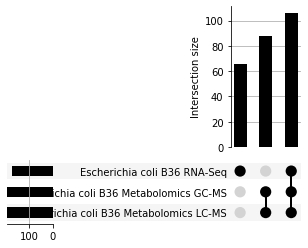

In [6]:
# this is the actual plotting block
upset = UpSet(omics_kegg, subset_size='count')#, intersection_plot_elements=3)
upset.plot()
plt.show()

## Filtering data to be visualised <a name="filtering"></a>

Pathways will be selected based on a FDR cutoff of less than 0.05 across all pathways. Then, a barplot displaying the quantity of genes will be generated. There are a few ways we can compare the data, across strain, across omics, with pathways, with genes. 

### *WORK IN PROGRESS* Comparing multi-omics data per strain (pathways)

For cross-omics comparisons within the strain, we first need to filter out results which have one or less multi-omics comparisons possible after filtering data (eg if we have *Bacteria foo* with only RNA-Seq data available, it is meaningless to include this bacterial strain). Any strains removed due to any applied filters are reported.

### *TODO* Comparing multi-omics data per strain (genes)

In [7]:
# load data
infile_path = "KEGG_Fisher_Exact_test_all_results.tsv"
data = pandas.read_csv(infile_path, sep="\t")
data["Species_Strain_Type_of_Experiment"] = data["Species"] + " " + data["Strain"] + " " + data["Type_of_Experiment"]
all_sp_strains = data["Species"] + " " + data["Strain"]
all_sp_strains_unique = all_sp_strains.unique()

# we want to filter out pathways of interest
# filter out the data points of interest
filter_unit = "FDR"
threshold = 0.05

superset = data.loc[data[filter_unit] > threshold]
subset = data.loc[data[filter_unit] < threshold]
subset_sp_strains = subset["Species"] + " " + subset["Strain"]
subset_sp_strains_unique = subset_sp_strains.unique()
subset.reset_index(inplace=True)

removed = set(all_sp_strains_unique) - set(subset_sp_strains_unique)
if removed:
    removed = str(removed)
else:
    removed = "None"

print(" ".join(["Data dimensions before", str(filter_unit), str(threshold), "filter:", str(data.shape)]))
print(" ".join(["Data dimensions after", str(filter_unit), str(threshold), "filter: ", str(subset.shape)]))
print(" ".join(["Strains removed by", str(filter_unit), str(threshold), "filter:", removed]))

# filter out the categories of interest
omics_kegg = subset.loc[ : , ['Species_Strain_Type_of_Experiment', 'kegg_pathway_name', 'Species', 'Strain', 'Type_of_Experiment'] ]
omics_kegg.drop_duplicates(inplace=True)
collapse_kegg = lambda x: "|".join(x).split("|")
omics_kegg = omics_kegg.groupby(omics_kegg['Species_Strain_Type_of_Experiment']).aggregate({'kegg_pathway_name':collapse_kegg})


# if comparing across omics, filter out single-omics entries
sp_strains = data["Species"] + " " + data["Strain"]
sp_strains_unique = sp_strains.unique()
sp_strains_unique.sort()
omics_kegg = omics_kegg.reset_index()
sp_strains = [omics_kegg[omics_kegg["Species_Strain_Type_of_Experiment"].str.contains(sp_strain)] for sp_strain in sp_strains_unique]

filtered = [sp_strain["Species_Strain_Type_of_Experiment"].unique() for sp_strain in sp_strains]
filtered = [x for y in filtered for x in y]
filtered = numpy.array(list(set([" ".join(x.split(" ", 3)[:3]) for x in filtered])))
filtered.sort()

strain_singleomics = list()
strain_multiomics = list()

for sp_strain in sp_strains:
    if len(sp_strain) > 1:
        sp_strain.set_index("Species_Strain_Type_of_Experiment", inplace=True)
        strain_multiomics.append(sp_strain)
    else:
        sp_strain.set_index("Species_Strain_Type_of_Experiment", inplace=True)
        strain_singleomics.append(sp_strain)

strain_singleomics = [x.reset_index()["Species_Strain_Type_of_Experiment"].tolist() for x in strain_singleomics]
strain_singleomics = [x for y in strain_singleomics for x in y]
strain_singleomics = [" ".join(x.split(" ", 3)[:3]) for x in strain_singleomics]
print("No multi-omic comparison available for strain(s):\n", pandas.DataFrame(strain_singleomics))


Data dimensions before FDR 0.05 filter: (31812, 16)
Data dimensions after FDR 0.05 filter:  (974, 17)
Strains removed by FDR 0.05 filter: {'Escherichia coli MS14387'}
No multi-omic comparison available for strain(s):
                                  0
0             Escherichia coli B36
1  Streptococcus pneumoniae 180/15
2   Streptococcus pneumoniae 180/2
3    Streptococcus pneumoniae 4496
4     Streptococcus pneumoniae 947
5      Streptococcus pyogenes 5448
6    Streptococcus pyogenes HKU419


Note that figure legends below are shortened as they overlap with figure elements. "M" replaces instances of "Metabolomics" and "P" replaces instances of "Proteomics".

/Users/tche0054/miniconda3/envs/graph/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


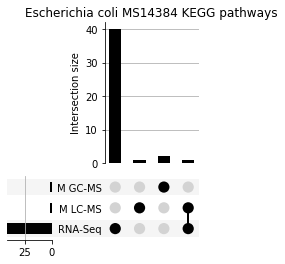

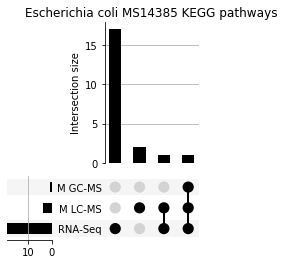

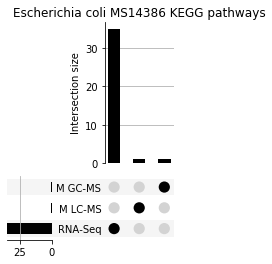

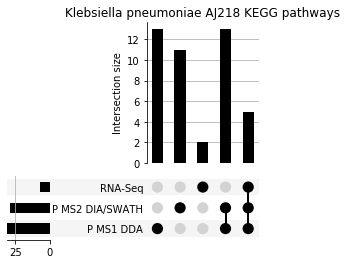

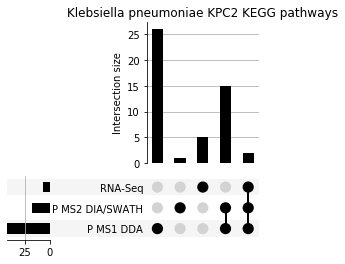

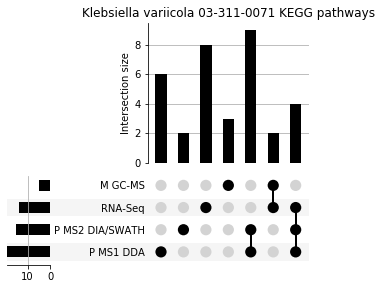

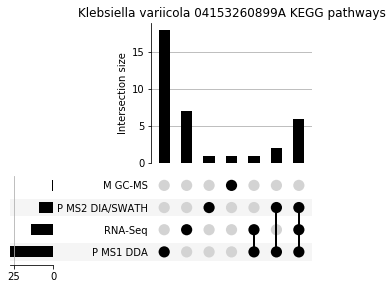

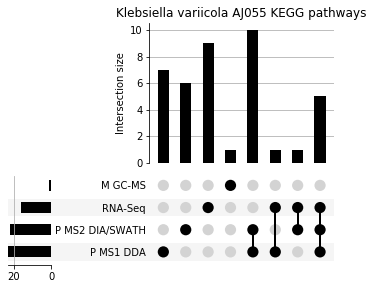

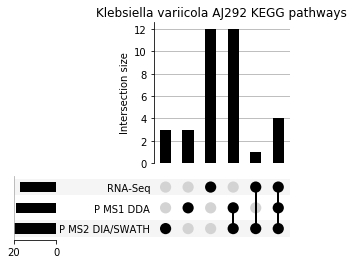

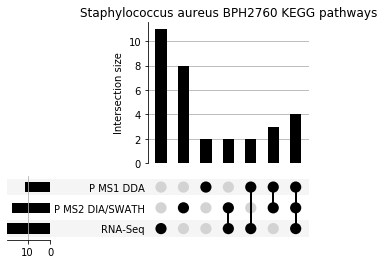

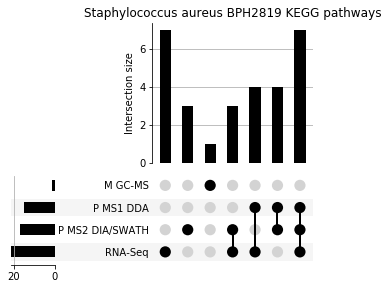

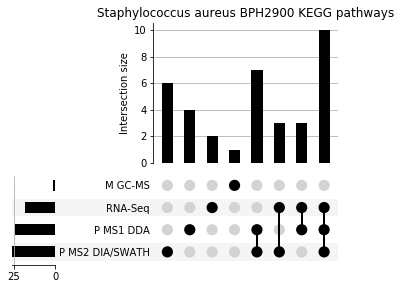

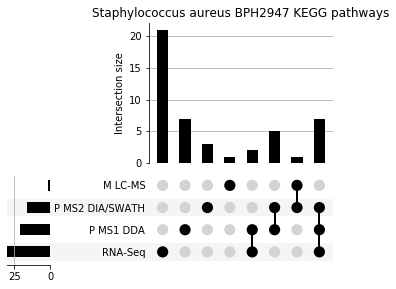

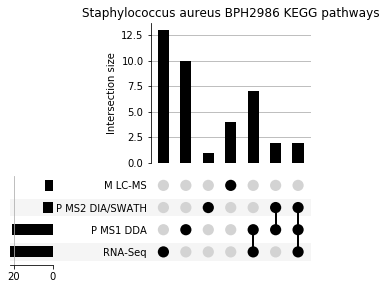

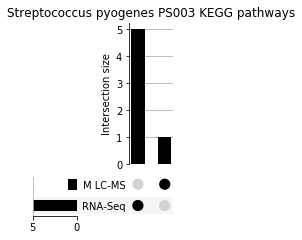

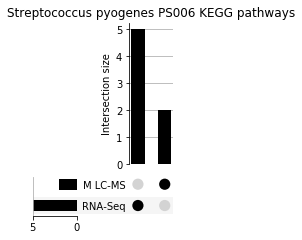

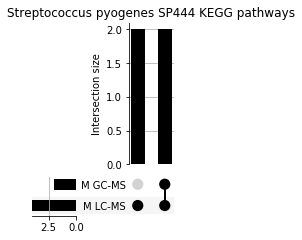

In [8]:
# the plotting block
for strain_multiomic in strain_multiomics:
    # legends too long and run off page, shorten
    strain_multiomic.reset_index(inplace=True)
    old_index = strain_multiomic["Species_Strain_Type_of_Experiment"]
    plt_title = [" ".join(x.split(" ", 3)[:3]) for x in old_index.tolist()]
    assert len(set(plt_title)) is 1, "There seems to be more than one species present within one comparison"
    new_index = [" ".join(x.split(" ", 3)[3:]) for x in old_index.tolist()]
    new_index = [omic.replace("Metabolomics", "M") for omic in new_index]
    new_index = [omic.replace("Proteomics", "P") for omic in new_index]
    strain_multiomic["Species_Strain_Type_of_Experiment"] = new_index
    strain_multiomic.set_index("Species_Strain_Type_of_Experiment", inplace=True)
    
    # reformat data to UpSetPlot format
    strain_multiomic = strain_multiomic.to_dict()['kegg_pathway_name']
    strain_multiomic = from_contents(strain_multiomic)
    upset = UpSet(strain_multiomic, subset_size='count')#, intersection_plot_elements=3)
    upset.plot()
    plt.title(" ".join([plt_title[0], "KEGG pathways"]))
    plt.show()

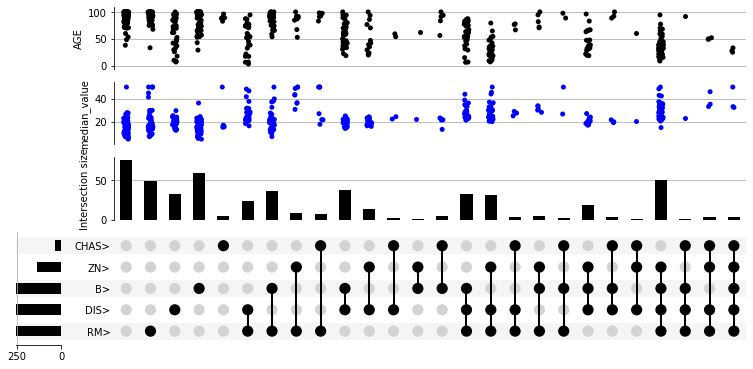

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE  \
CHAS> B>   ZN>   DIS> RM>                                                    
False True True  True True  0.00632  18.0   2.31   0.0  0.538  6.575  65.2   
           False True True  0.02731   0.0   7.07   0.0  0.469  6.421  78.9   
                      True  0.02729   0.0   7.07   0.0  0.469  7.185  61.1   
                      True  0.03237   0.0   2.18   0.0  0.458  6.998  45.8   
                      True  0.06905   0.0   2.18   0.0  0.458  7.147  54.2   

                               DIS  RAD    TAX  PTRATIO       B  LSTAT  \
CHAS> B>   ZN>   DIS> RM>                                                
False True True  True True  4.0900  1.0  296.0     15.3  396.90   4.98   
           False True True  4.9671  2.0  242.0     17.8  396.90   9.14   
                      True  4.9671  2.0  242.0     17.8  392.83   4.03   
                      True  6.0622  3.0  222.0     18.7  394.63   2.94   
                      True  6.0622  3.0  222.0     18.7  396.90   5.33   

                            median_value  
CHAS> B>   ZN>   DIS> RM>                 
False True True  True True          24.0  
           False True True          21.6  
                      True          34.7  
                      True          33.4  
                      True          36.2

In [9]:
# more complex example (reference only, requires scikit-learn to be installed)
import pandas as pd
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from upsetplot import UpSet

# Load the dataset into a DataFrame
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Get five features most correlated with median house value
correls = boston_df.corrwith(pd.Series(boston.target),
                             method='spearman').sort_values()
top_features = correls.index[-5:]

# Get a binary indicator of whether each top feature is above average
boston_above_avg = boston_df > boston_df.median(axis=0)
boston_above_avg = boston_above_avg[top_features]
boston_above_avg = boston_above_avg.rename(columns=lambda x: x + '>')

# Make this indicator mask an index of boston_df
boston_df = pd.concat([boston_df, boston_above_avg],
                      axis=1)
boston_df = boston_df.set_index(list(boston_above_avg.columns))

# Also give us access to the target (median house value)
boston_df = boston_df.assign(median_value=boston.target)

# UpSet plot it!
upset = UpSet(boston_df, subset_size='count', intersection_plot_elements=3)
upset.add_catplot(value='median_value', kind='strip', color='blue')
upset.add_catplot(value='AGE', kind='strip', color='black')
upset.plot()
plt.show()
boston_df.head()